In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [6]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# Aquila_18

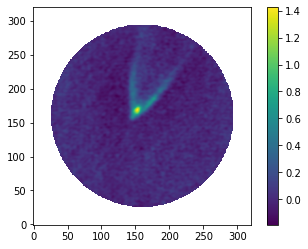

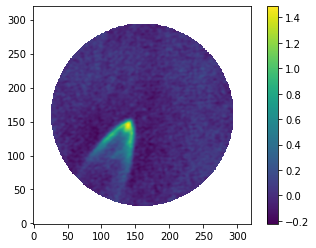

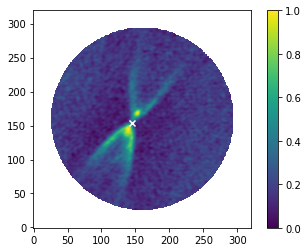

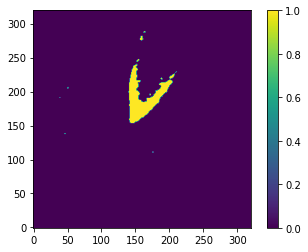

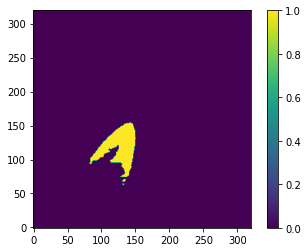

In [7]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_18_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_18_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.13,1.0,0.0 )
maskr = np.where(image_datar > 0.2,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [8]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

In [9]:
#import skycoord, units, wcs, fits, from astropy
#from fits header create a wcs object
#using wcs object and ra dec inputs create a skycoord object
# wcsobj.worldttopix() convert the skycoord object to pixel x and y


from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename


f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 32 13.24 -1 57 30.97', unit=(u.hourangle, u.deg))
x_source, y_source = w.world_to_pixel(sky)

print(x_source, y_source) 

145.00960536514052 153.06476917371356


(320, 320)


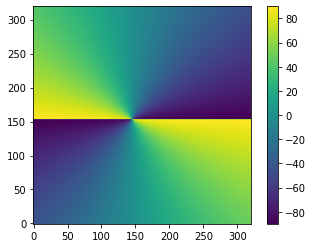

In [10]:
#print(image_header['CRPIX1'])
#print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)
 
for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-y_source
        y = j-x_source
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

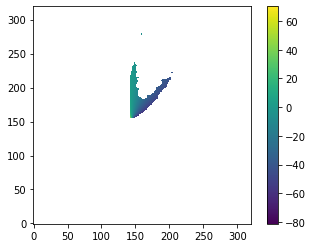

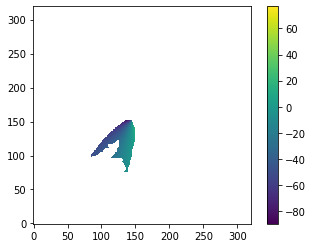

In [11]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
#R[:225,:] =np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [12]:
#print(len(binrange))

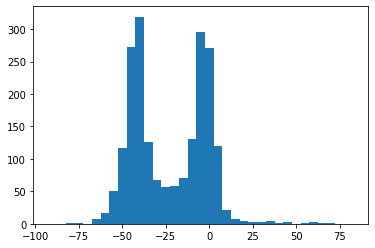

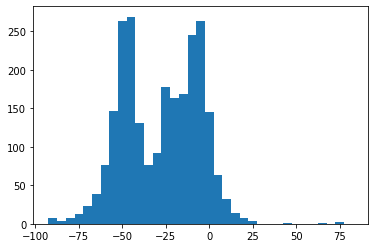

[  0.   0.   2.   1.   0.   7.  17.  50. 116. 273. 319. 126.  67.  56.
  58.  71. 130. 295. 271. 120.  21.   8.   5.   3.   3.   5.   1.   3.
   0.   1.   3.   1.   1.   0.   0.]
[-92.5 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5
 -32.5 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5
  27.5  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]
35 36
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.]


In [13]:
binrange = np.arange(-92.5,87.5,5)
outputb = plt.hist(B.flatten(),bins=binrange)
plt.show()
outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)

(array([], dtype=int64),)


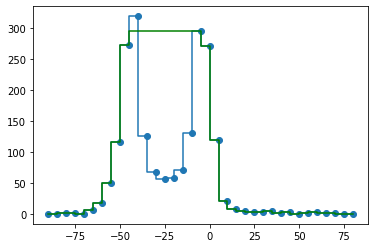

In [14]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

#cent=np.where(PA==0)[0][0]

#flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

#flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
#print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_array_x,flipped_array_y, ds='steps')
#plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((PA[:10], PA[-18:]))
y_subset = np.concatenate((outputb[0][:10], outputb[0][-18:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

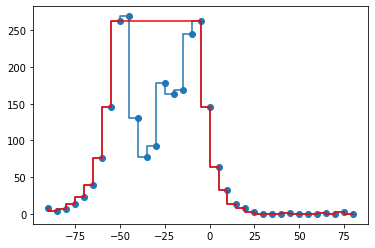

In [15]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])


#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:9], PA[-18:]))
y_subsetr = np.concatenate((outputr[0][:9], outputr[0][-18:]))
plt.plot(x_subsetr,y_subsetr, ds='steps', color='r')

Std error [0.39965929 0.72595433]


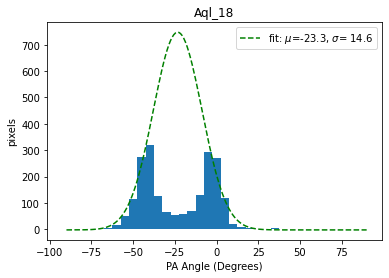

Std error [0.07461068 0.16575024]


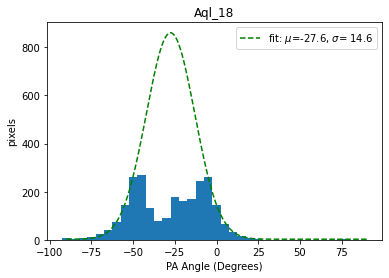

In [16]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-25,35,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-37.5,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [17]:
print(C)

[[-1.85971128  2.40559157]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


Blue Velocity Lobe
Largest Y Peak (Left of x=-20): 319.0
Corresponding x for Largest Y (Left of x=-20): 45.0
Largest Y Peak (Right of x=-20): 295.0
Corresponding x for Largest Y (Right of x=-20): 0.0 

Angle Measurement between peaks: 45.0 

xm1 -45.0
Red Velocity Lobe
Largest Y Peak (Left of x=-20): 269.0
Corresponding x for Largest Y (Left of x=-20): 50.0
Largest Y Peak (Right of x=-20): 263.0
Corresponding x for Largest Y (Right of x=-20): 5.0 

Angle Measurement between peaks: 45.0 



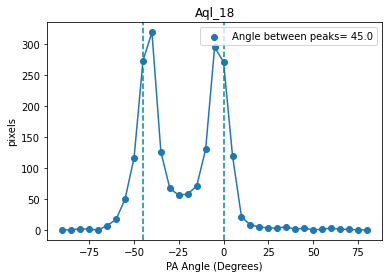

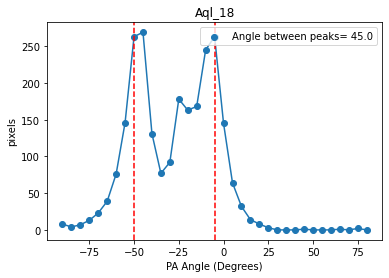

In [18]:
#Diego's Method

largest_y_left = float('-inf')  
largest_y_right = float('-inf')  

x_largest_left = 0
x_largest_right = 0


for x, y in zip(PA, outputb[0]):
    # Check if x is less than -50 (left side)
    if x < -20 and y > largest_y_left:
        largest_y_left = y
        x_largest_left = abs(x-5)
        x_marker1=x-5
    # Check if x is greater than -50 (right side)
    elif x > -20 and y > largest_y_right:
        largest_y_right = y
        x_largest_right = abs(x+5)
        x_marker2=x+5
    final=abs(x_largest_right-x_largest_left)

print("Blue Velocity Lobe")
print("Largest Y Peak (Left of x=-20):", largest_y_left)
print("Corresponding x for Largest Y (Left of x=-20):", x_largest_left)
print("Largest Y Peak (Right of x=-20):", largest_y_right)
print("Corresponding x for Largest Y (Right of x=-20):", x_largest_right,"\n")
print("Angle Measurement between peaks:", final,"\n")

print("xm1",x_marker1)

#Plot Blue


plt.figure()
plt.scatter(PA, outputb[0])
plt.plot(PA, outputb[0])
plt.legend(["Angle between peaks= " + str(final)], loc='upper right')
plt.axvline(x_marker1,ls='dashed', c='darkcyan')
plt.axvline(x_marker2,ls='dashed', c='darkcyan')
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_blue_diff.pdf",dpi=300)



largest_y_left = float('-inf')  
largest_y_right = float('-inf')  

x_largest_left = 0
x_largest_right = 0


for x, y in zip(PA, outputr[0]):
    # Check if x is less than -50 (left side)
    if x < -25 and y > largest_y_left:
        largest_y_left = y
        x_largest_left = (abs(x-5))
        x_rmarker1=x-5
    # Check if x is greater than -50 (right side)
    elif x > -25 and y > largest_y_right:
        largest_y_right = y
        x_largest_right = (abs(x))
        x_rmarker2=x
    final=abs(x_largest_right-x_largest_left)

print("Red Velocity Lobe")
print("Largest Y Peak (Left of x=-20):", largest_y_left)
print("Corresponding x for Largest Y (Left of x=-20):", x_largest_left)
print("Largest Y Peak (Right of x=-20):", largest_y_right)
print("Corresponding x for Largest Y (Right of x=-20):", x_largest_right,"\n")
print("Angle Measurement between peaks:", final,"\n")



#Plot Red


plt.figure()
plt.scatter(PA, outputr[0])
plt.plot(PA, outputr[0])
plt.legend(["Angle between peaks= " + str(final)], loc='upper right')
plt.axvline(x_rmarker1,ls='dashed', c='r')
plt.axvline(x_rmarker2,ls='dashed', c='r')
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_red_diff.pdf",dpi=300)

### Ring Masks

0.0016025641025641025 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (278.05516667, -1.95860278)>
Region: CirclePixelRegion
center: PixCoord(x=145.00960536514052, y=153.06476917371356)
radius: 41.208685687335304
(320, 320)


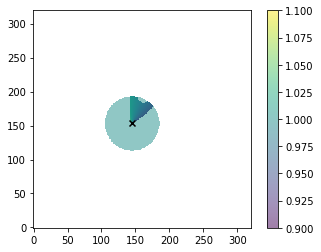

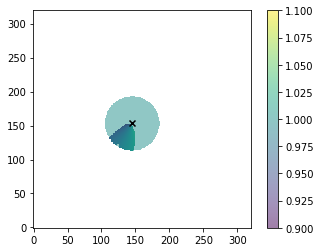

In [19]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 32 13.24 -1 57 30.97', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.00160256 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

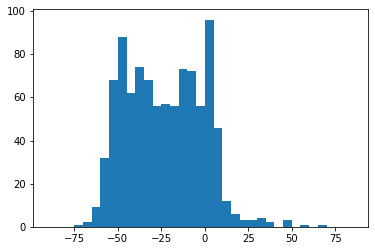

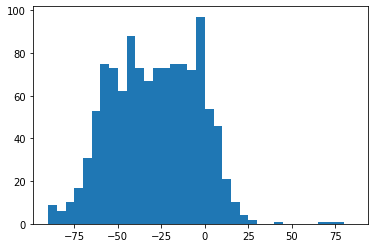

[ 0.  0.  0.  1.  2.  9. 32. 68. 88. 62. 74. 68. 56. 57. 56. 73. 72. 56.
 96. 46. 12.  6.  3.  3.  4.  2.  0.  3.  0.  1.  0.  1.  0.  0.  0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [20]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)


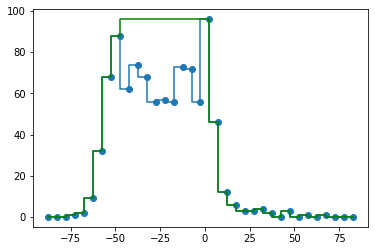

In [21]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

#cent=np.where(PA==0)[0][0]

#flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

#flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
#print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_array_x,flipped_array_y, ds='steps')
#plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((PA[:9], PA[-17:]))
y_subset = np.concatenate((outputb[0][:9], outputb[0][-17:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

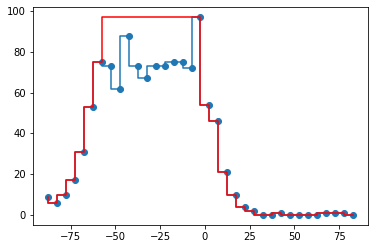

In [22]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])


#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:7], PA[-18:]))
y_subsetr = np.concatenate((outputr[0][:7], outputr[0][-18:]))
plt.plot(x_subsetr,y_subsetr, ds='steps', color='r')

Std error [0.27695139 0.64667215]


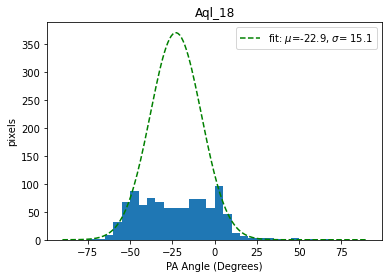

Std error [0.24607226 0.53151725]


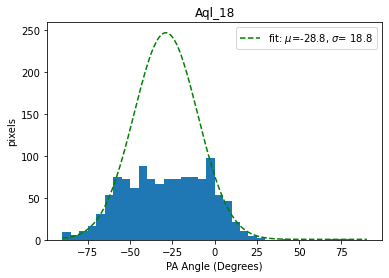

In [23]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-25,35,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-37.5,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (278.05516667, -1.95860278)>
Region: CirclePixelRegion
center: PixCoord(x=145.00960536514052, y=153.06476917371356)
radius: 82.41685708895665
(320, 320)


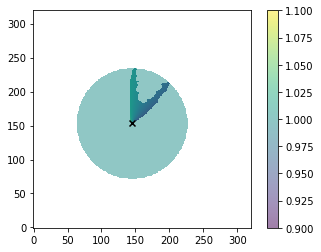

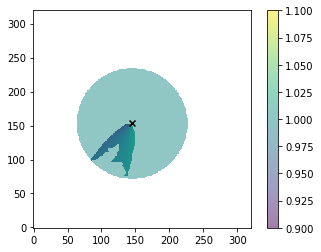

In [31]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 32 13.24 -1 57 30.97', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.0032051 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

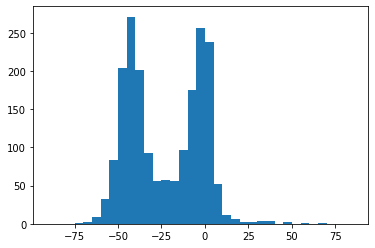

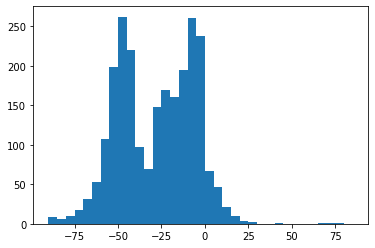

[  0.   0.   0.   1.   2.   9.  32.  83. 204. 271. 201.  92.  56.  57.
  56.  96. 175. 256. 238.  52.  12.   6.   3.   3.   4.   4.   0.   3.
   0.   1.   0.   1.   0.   0.   0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [32]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)


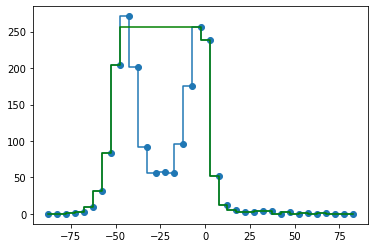

In [40]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

#cent=np.where(PA==0)[0][0]

#flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

#flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
#print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_array_x,flipped_array_y, ds='steps')
#plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((PA[:9], PA[-18:]))
y_subset = np.concatenate((outputb[0][:9], outputb[0][-180.0032051:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

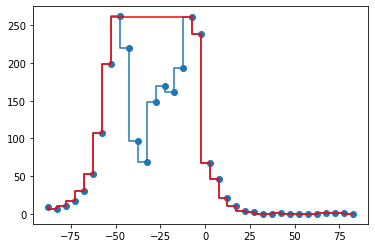

In [41]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])


#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:8], PA[-19:]))
y_subsetr = np.concatenate((outputr[0][:8], outputr[0][-19:]))
plt.plot(x_subsetr,y_subsetr, ds='steps', color='r')

Std error [0.46827166 0.8706923 ]


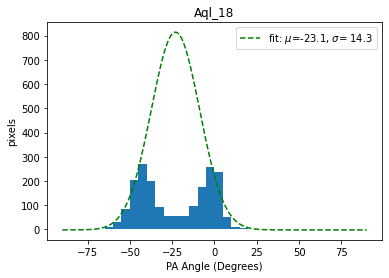

Std error [0.41239123 0.74473583]


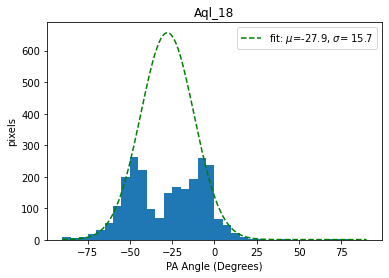

In [42]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-25,35,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-37.5,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

### Annulus Masks

0.0016025641025641025 deg
0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (278.05516667, -1.95860278)>
Region: CircleAnnulusPixelRegion
center: PixCoord(x=145.00960536514052, y=153.06476917371356)
inner_radius: 41.20878854447808
outer_radius: 82.41737137467061
(320, 320)


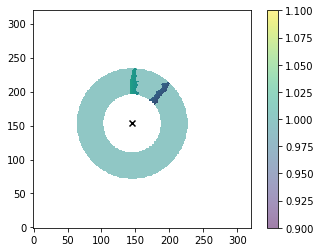

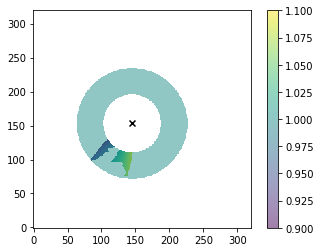

In [24]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut1 = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut1)
radial_cut2 = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut2)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleAnnulusSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 32 13.24 -1 57 30.97', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleAnnulusSkyRegion(center=c, inner_radius=0.001602564 * u.deg,outer_radius=0.00320512 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
#maskedb[250:,:] =np.nan
#maskedb[215:,:] =np.nan
#maskedb[:140,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
#add_scalebar(ax, scalebar_angle, label="1,000 au", color="black")
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#maskedr[:,:150] =np.nan
#maskedr[200:, :] = np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower',alpha=0.5)
plt.colorbar()
plt.show()

In [25]:
#print(len(binrange))

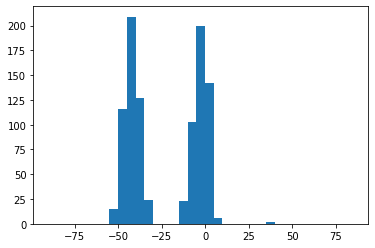

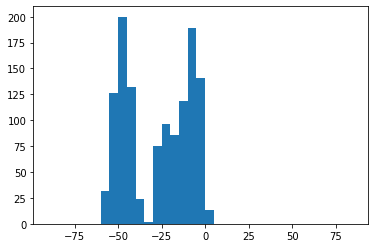

[  0.   0.   0.   0.   0.   0.   0.  15. 116. 209. 127.  24.   0.   0.
   0.  23. 103. 200. 142.   6.   0.   0.   0.   0.   0.   2.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [26]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

(array([17]),)


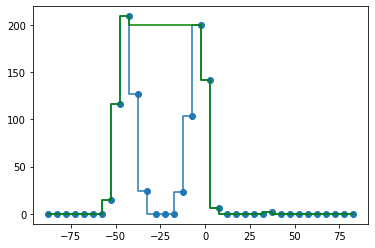

In [27]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

#cent=np.where(PA==0)[0][0]

#flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

#flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
#print(len(flipped_array_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_array_x,flipped_array_y, ds='steps')
#plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((PA[:10], PA[-18:]))
y_subset = np.concatenate((outputb[0][:10], outputb[0][-18:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

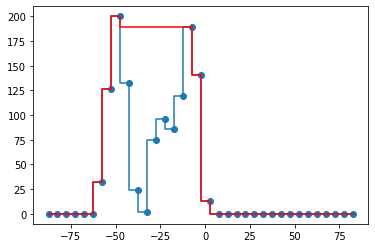

In [28]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])


#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:9], PA[-19:]))
y_subsetr = np.concatenate((outputr[0][:9], outputr[0][-19:]))
plt.plot(x_subsetr,y_subsetr, ds='steps', color='r')

Std error [0.27160094 0.6241856 ]


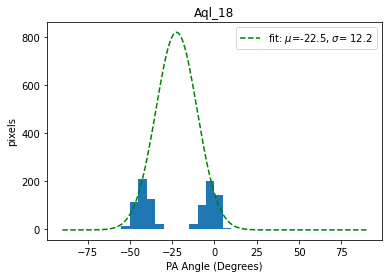

Std error [0.29217098 0.64179865]


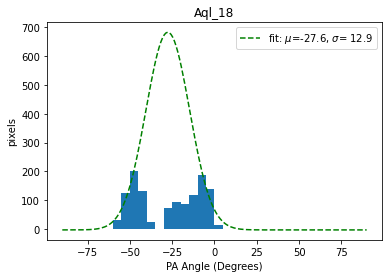

In [29]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-25,35,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-37.5,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_18")
plt.savefig("Aql_18_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]